# Mataija Henderson

# Research Question

**Do delays in flight departures have a bigger negative impact on overall customer satisfaction with the flight than delays in arrivals and does type of travel or loyalty status have an effect?**

## Research question/interests

I am mainly interested in psychology. A few topics that I enjoy learning about are social and developmental psychology. Having two members interested in psychology and one interested in management has led us to look at airline customer data to see customer satisfaction.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dta = pd.read_csv("../data/raw/Invistico_Airline.csv")



Data analysis plan: To answer this question, I will make a subsetted dataframe only including the customer satisfaction score, arrival delay, departure delay, type of travel, and class columns to make the dataset more manageable to work with. Then, I will make two graphs, one for arrival delay and one for departure delay looking at the level of satisfaction for customers based on their type of travel, possibly sorted into time intervals to condense the data in the graph and make it easier to read, to see which type of delay causes a bigger decrease in satisfaction. I will then do the same for graphs of loyalty status to compare the two.


In [ ]:
dta.describe()
dta.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
# Looking at delay
dtaDelays = pd.DataFrame(dta, columns= ['Departure Delay in Minutes','Arrival Delay in Minutes'])
dtaDelays

,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0.0
1,310,305.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
129875,0,0.0
129876,174,172.0
129877,155,163.0
129878,193,205.0


In [ ]:
# looking at a subset of only the variables of interest
dtaAll = dta[['Type of Travel','Customer Type','Departure Delay in Minutes','Arrival Delay in Minutes', 'satisfaction']]
dtaAll

,Type of Travel,Customer Type,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Personal Travel,Loyal Customer,0,0.0,satisfied
1,Personal Travel,Loyal Customer,310,305.0,satisfied
2,Personal Travel,Loyal Customer,0,0.0,satisfied
3,Personal Travel,Loyal Customer,0,0.0,satisfied
4,Personal Travel,Loyal Customer,0,0.0,satisfied
...,...,...,...,...,...
129875,Personal Travel,disloyal Customer,0,0.0,satisfied
129876,Personal Travel,disloyal Customer,174,172.0,dissatisfied
129877,Personal Travel,disloyal Customer,155,163.0,dissatisfied
129878,Personal Travel,disloyal Customer,193,205.0,dissatisfied


In [ ]:
# Adding a total delay column
dta['Total Delay'] = dta['Departure Delay in Minutes'] + dta['Arrival Delay in Minutes']
dta.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Total Delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,3,0,3,5,3,2,0,0.0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,3,4,4,4,2,3,2,310,305.0,615.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,3,3,4,4,4,2,0,0.0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,1,0,1,4,1,3,0,0.0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,2,0,2,4,2,5,0,0.0,0.0


<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

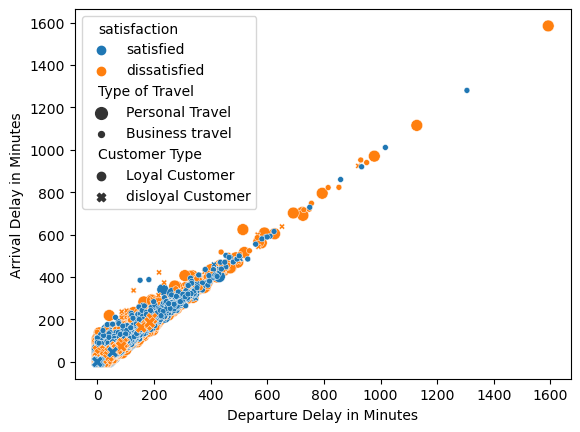

In [ ]:
# Plotting relationship between all variables
sns.scatterplot(data=dta, x='Departure Delay in Minutes',
                y='Arrival Delay in Minutes', hue = 'satisfaction', style ='Customer Type', size='Type of Travel')


<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

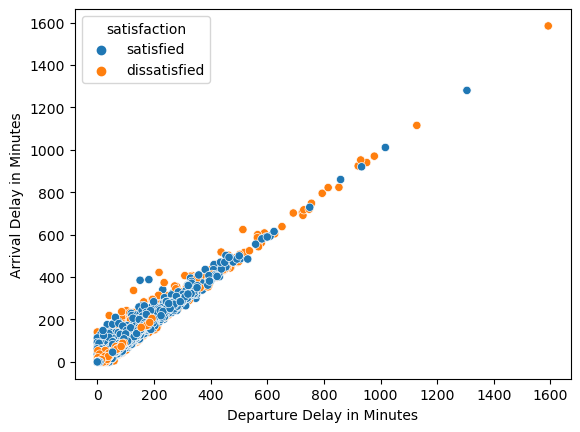

In [ ]:
# Splitting up the variables, the above scatterplot is very cluttered

# Delay times and Satisfaction levels only
sns.scatterplot(data=dta, x='Departure Delay in Minutes',
                y='Arrival Delay in Minutes', hue = 'satisfaction')

In [ ]:
sns.stripplot(data=dta, x='satisfaction',
                y='Customer Type')